# Individual Planning Report

Please install and run the libraries listed below in advance.

In [42]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(janitor)
options(repr.plot.width=10, repr.plot.height=10)

## 1. Data Description

### Dataset: players.csv

This report explores data collected by a UBC research group on how people play video games, focusing on a Minecraft server they set up. The first dataset (`players.csv`) contains 196 observations, with each row representing one player (see **Table 1** for a detailed description of each variable). Several issues were also identified and will be addressed in Part 3:

- Variable names are not in a standardized format.
- `experience` and `gender` should be treated as a factor variable.

The code below first reads the dataset using the shortest relative path and then calculates the minimum and maximum values for the two numeric variables, `played_hours` and `age`.

In [15]:
players <- read_csv("data/players.csv")

players_min_max <- players |>
    summarize(played_hours_min = round(min(played_hours, na.rm = TRUE), 2),
    age_min = round(min(Age, na.rm = TRUE),2),
    played_hours_max = round(max(played_hours, na.rm = TRUE), 2),
    age_max = round(max(Age, na.rm = TRUE),2))
players_min_max

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


played_hours_min,age_min,played_hours_max,age_max
<dbl>,<dbl>,<dbl>,<dbl>
0,9,223.1,58


#### Table 1 - Variable Description of Dataset players
| Name | Type | Description | Min | Max |
| ---- | ---- | ---- | ---- | ---- |
| `experience` | chr | Player experience level (Amateur, Beginner, Pro, Regular, and Veteran) | N/A | N/A |
| `subscribe` | lgl | Whether the player has subscribed to a game-related newsletter | N/A | N/A |
| `hashedEmail` | chr | Anonymized email identifier for each player | N/A | N/A |
| `played_hours` | dbl | Number of hours the player played | 0 | 223.1 |
| `name` | chr | Player's name | N/A | N/A |
| `gender` | chr | Player's gender | N/A | N/A |
| `Age` | dbl | Player's age in years | 9 | 58 |


### Data: sessions.csv

The second dataset (`sessions.csv`) contains 1535 observations, with each row representing an individual play sessions by one player (see **Table 2** for a detailed description of each variable). Several issues were also identified:
- `hashedEmail` is not in a standardized format.
- In order to compute min and max, we need to convert `start_time` and `end_time` into POSIXct type using `as.POSIXct()` function, which stores date and time in seconds with the number of seconds.

The code below first reads the dataset using the shortest relative path and then calculates the minimum and maximum values for the two numeric variables, `original_start_time` and `original_end_time`.

In [16]:
sessions <- read_csv("data/sessions.csv")

sessions_min_max <- sessions |>
    summarize(original_start_time_min = round(min(original_start_time, na.rm = TRUE), 2),
    original_end_time_min = round(min(original_end_time, na.rm = TRUE),2),
    original_start_time_max = round(max(original_start_time, na.rm = TRUE), 2),
    original_end_time_max = round(max(original_end_time, na.rm = TRUE),2))
sessions_min_max

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


original_start_time_min,original_end_time_min,original_start_time_max,original_end_time_max
<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.7124e+12,1.72733e+12,1.72734e+12


#### Table 2: Variable Description of Dataset sessions
| Name | Type | Description | Min | Max |
| ---- | ---- | ---- | ---- | ---- |
| `hashedEmail` | chr | Player's hashed email address | N/A | N/A |
| `start_time` | chr | The time that the player starts to play | N/A | N/A |
| `end_time` | chr | Players' email | N/A | N/A |
| `original_start_time` | dbl | Number of hours the player played | 1.7124e+12 | 1.72733e+12 |
| `original_end_time` | dbl | Name of the player | 1.7124e+12	 | 1.72734e+12 |

## 2. Questions

My **broad question** is Question 2: “Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.” 

My **specific question** is: “Can players’ age predict the total number of hours the player played?" In this context, players who have played for a greater number of hours are considered to contribute a “larger amount of data”, while those with fewer hours are considered to contribute less.

To answer this question, `players.csv` will be used as it contains both the explanatory variable (`Age`), and response variable of interest (`played_hours`). To prepare the data for a multivariable linear regression analysis, data will be wrangled in the following steps:
1. Put variable names into standardized format using `clean_names()`.
2. Produce a final dataset that only includes:
    - `played_hours` (numeric)
    - `age` (numeric)

## 3. Exploratory Data Analysis and Visualization

Following the steps above, we convert `players` into a tidy tibble (`players_aggregate`):

In [21]:
players_aggregate <- players |>
    clean_names() |>
    select(played_hours, age)
players_aggregate

played_hours,age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


We compute the mean value for the quantitative variables (`played_hours` and `age`), and we present the values in **Table 3**: 


In [22]:
mean <- players_aggregate |>
    summarize(played_hours_mean = mean(played_hours, na.rm = TRUE),
    age_mean = mean(age, na.rm = TRUE))
mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


#### Table 3: Mean values
| Played Hours | Age |
| ---- | ----|
| 5.845918 | 21.13918|

From **Graph 1**, we observe several extreme values, with most players having relatively low to moderate playtime (between 0 to 50 hours) but a few playing for extremely long hours. This suggests the presence of outliers that could disproportionately influence a linear regression model. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


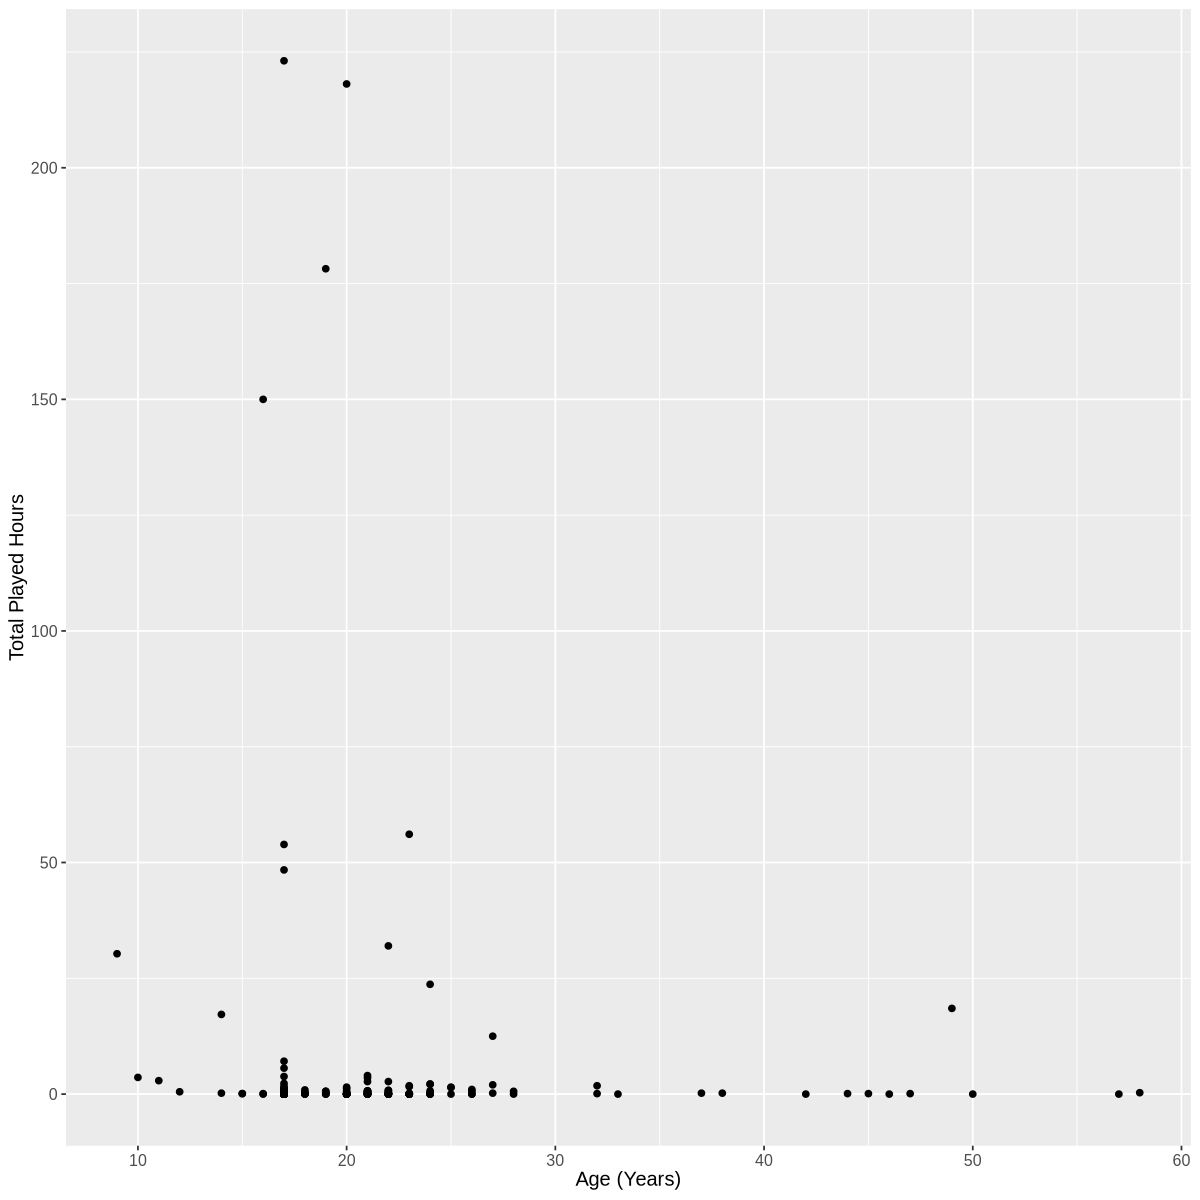

In [58]:
players_plot_1 <- players_aggregate |>
    ggplot(aes(x = age, y = played_hours))+
    geom_point()+
    labs(x = "Age (Years)", y = "Total Played Hours", title = "Graph 1: Age vs Played Hours") +
    theme(text = element_text(size = 20))
players_plot

To further understand the distribution of played_hours, we generated a histogram in **Graph 2**, which shows a highly right-skewed distribution. These insights indicate that the variable `played_hours` contains outliers that can disproportionately influence a linear regression model, potentially skewing the estimated relationship between age and total playtime. Therefore, caution is needed when applying linear regression.

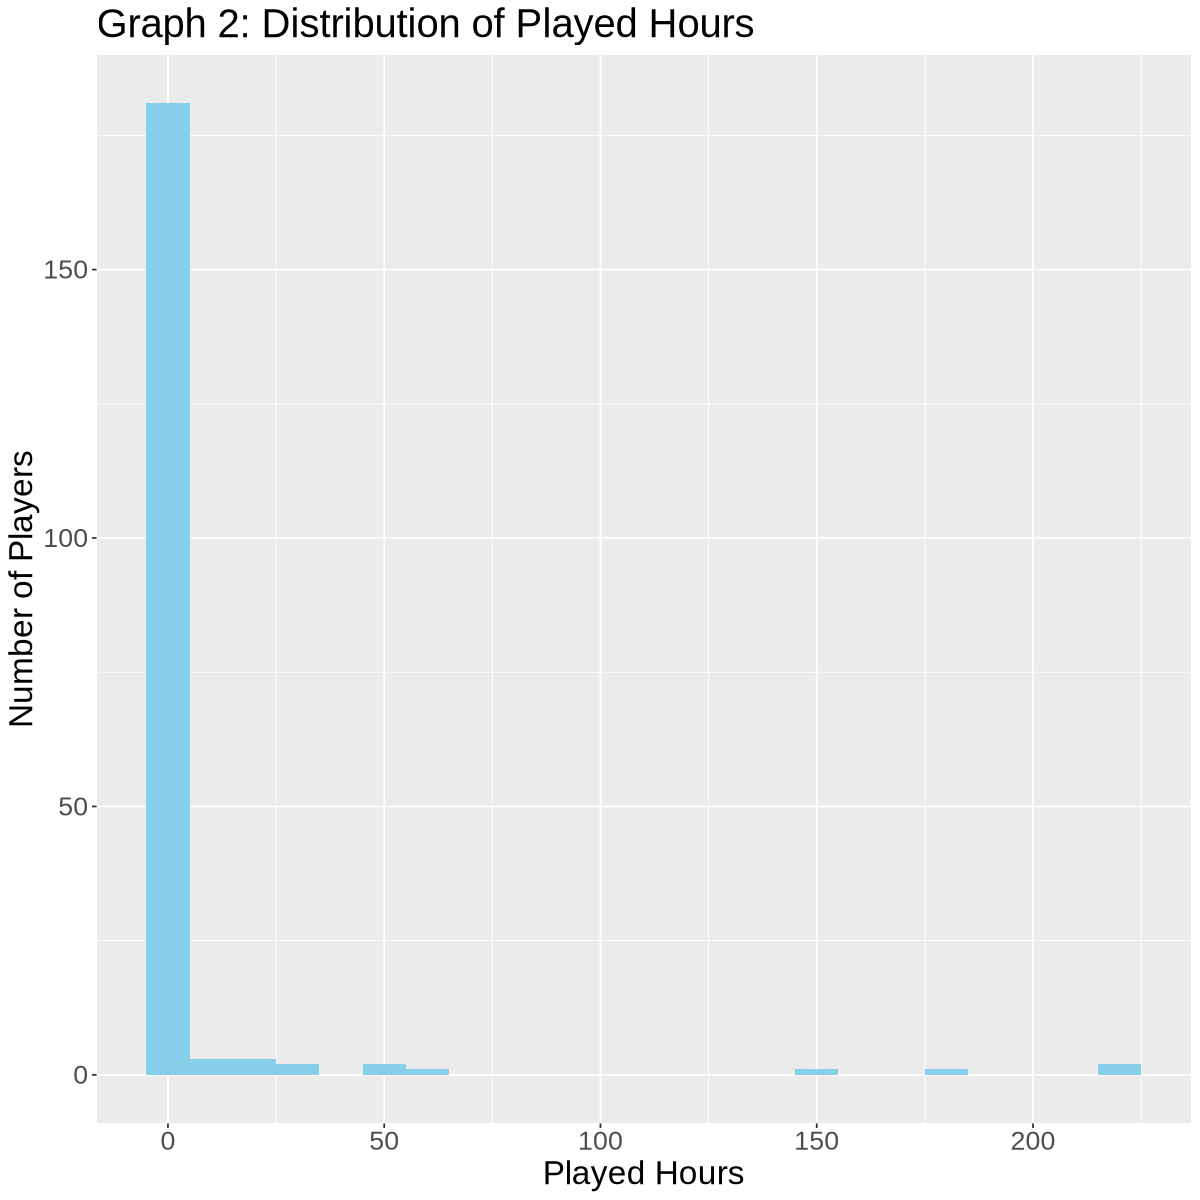

In [57]:
players_plot_2 <- players_aggregate |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10, fill = "skyblue") +
    labs(x = "Played Hours", y = "Number of Players", title = "Graph 2: Distribution of Played Hours") +
    theme(text = element_text(size = 20))
players_plot_2

## 4. Methods and Plan

I will employ a simple linear regression to answer the question. 

##### Why is this method appropriate?
Simple linear regression is appropriate because the goal is to examine whether there is a linear relationship between two continous variables instead of categorical variables. It allows us to quantify the strength and direction of the association and make predictions of played hours based on age.
##### Which assumptions are required, if any, to apply the method selected?
The relationship between `age` and `played_hours` is assumed to be approximately linear as nonlinear relationship between the two variables will not be fully captured by a simple linear regression
##### What are the potential limitations or weaknesses of the method selected?
As mentioned earlier, a major limitation is the presence of outliers, which can disproportionately affect the regression line. In addition, a simple linear regression only investigates the relationship between two variables; however, other relevant factors such as gender, experience, and subscription status are ignored, which could confound the relationship.
##### How are you going to process the data to apply the model?
I chose to split the dataset using 75% of the observations for training and 25% for testing because this proportion provides a good balance between having enough data to fit a stable linear regression model while still keeping a sufficiently large test set to evaluate how well the model generalizes to unseen data. Since we do not need to choose K in the context of linear regression, we do not need to perform cross-validation. 